In [1]:
%reset -f
from utils import *
from wavhandler import *
import os
import soundfile as sf
import matplotlib.pyplot as plt
from utils import np_hist

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


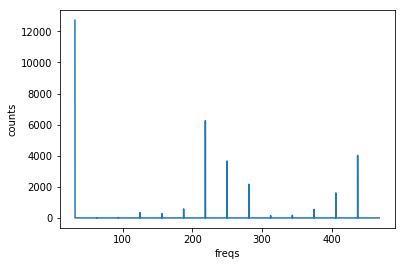

In [5]:
dataset = Dataset('LG')#C. pomonella')#D. suzukii')
dataset.load(only_names=False)
X = dataset.X
y = dataset.y
filenames = dataset.filenames
dataset.get_frequency_peaks()

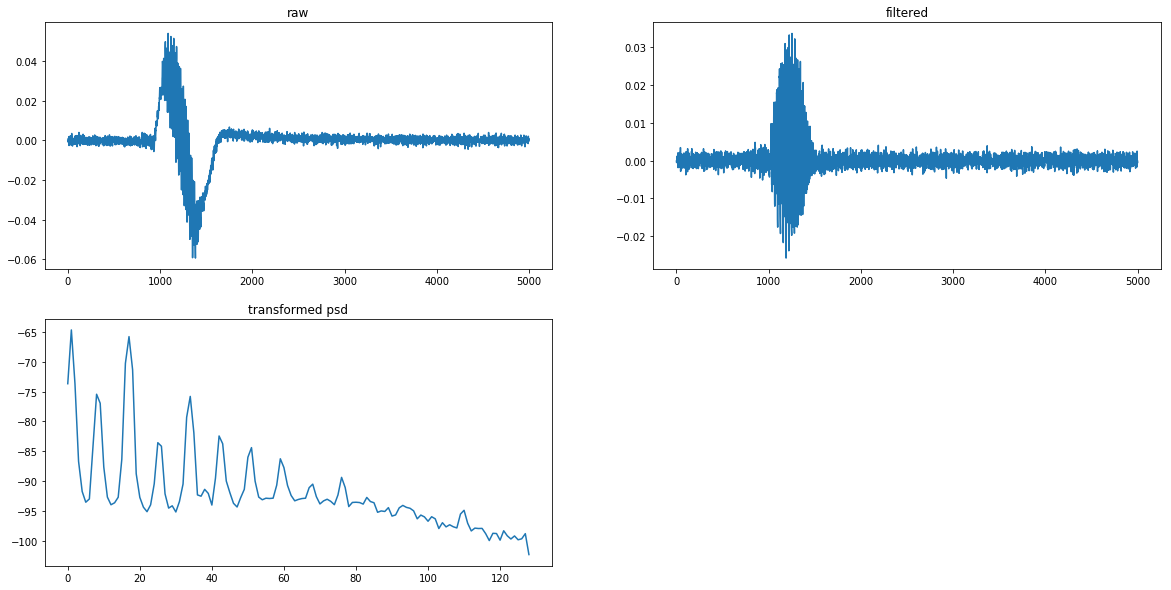

In [6]:
plot_wingbeat(data = X[np.random.randint(0,31),:])

In [146]:
df = pd.DataFrame(pd.Series(filenames).apply(lambda x: get_wingbeat_timestamp(x)).value_counts())

In [147]:
df['counts'] = df[0]
df['ind'] = df.index

Text(0.5,1,'Activity times of D.Suzukii')

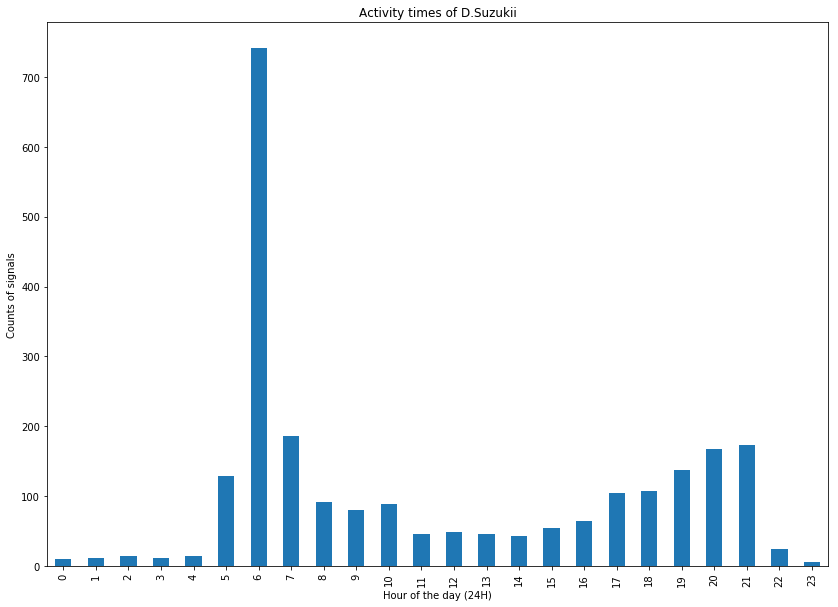

In [148]:
df.counts.sort_index().plot(kind='bar', figsize=(14,10))
plt.ylabel('Counts of signals')
plt.xlabel('Hour of the day (24H)')
plt.title('Activity times of D.Suzukii')

In [149]:
df_feats = dataset.get_sensor_features()

Text(0,0.5,'Counts of signals')

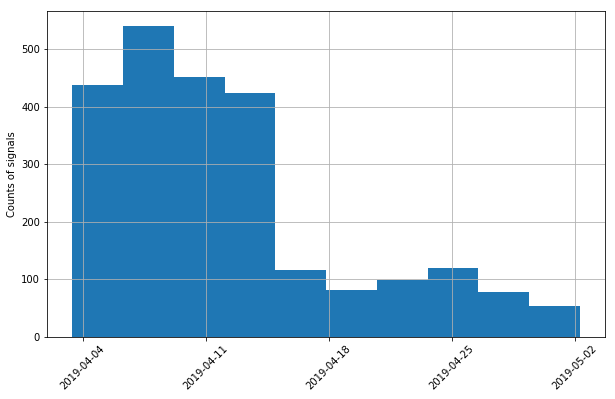

In [150]:
plt.figure(figsize=(10,6))
df_feats.date.hist(xrot=45)
plt.ylabel('Counts of signals')

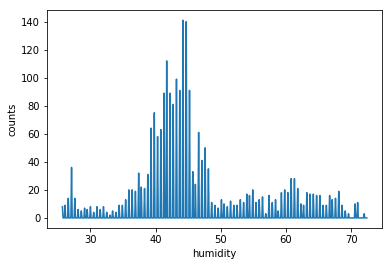

In [151]:
np_hist(df_feats, 'humidity')

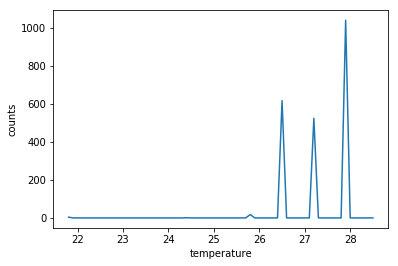

In [152]:
np_hist(df_feats, 'temperature')